# TEXT ANALYTICS GROUP ASSIGNMENT #2

#### Group Members: Brooks Beckelman, Zack Bilderback, Dallas Griffin, Estevan Gonzalez, Sean Kessel, Davis Townsend

In [2]:
import pandas as pd
from pandas import Series, DataFrame
%pylab inline

import seaborn as sns

import sklearn
from sklearn.cross_validation import train_test_split
from sklearn import linear_model
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import CountVectorizer

Populating the interactive namespace from numpy and matplotlib


In [3]:
yelp = pd.read_csv('YelpData.csv')

In [4]:
# Convert rating to high (4,5) or low (1,2,3)
yelp['rating'] = np.where(yelp['stars'] >= 4, 'high','low')
yelp.head(3)

,stars,votes_cool,votes_funny,votes_useful,Cheap,Moderate,Expensive,VeryExpensive,American,Chinese,...,Indian,Italian,Greek,Mediterranean,Mexican,Thai,Vietnamese,Others,Review,rating
0,1,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,This location is out of business. I drove by i...,low
1,2,2,2,2,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,= = = = = = CLOSED = = = = = =This JB s locati...,low
2,4,0,0,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,This is just a basic (albeit mini) chain greas...,high


## Task A: Numeric Data Only

In [5]:
# Split data into train and test sets
train, test = train_test_split(yelp, test_size=0.25, random_state=123)

x_train = train.drop(['stars', 'Review', 'rating'], axis=1)
y_train = train['rating']

x_test = test.drop(['stars', 'Review', 'rating'], axis=1)
y_test = test['rating']

### Logistic Regression

In [6]:
logreg = linear_model.LogisticRegression()
logreg_classifier = logreg.fit(x_train, y_train)
logreg_predict = logreg.predict(x_test)

In [7]:
print 'LOGISTIC REGRESSION: '
print 'Precision:' + str(metrics.precision_score(y_test, logreg_predict, average = 'binary', pos_label='high'))
print 'Recall: ' + str(metrics.recall_score(y_test, logreg_predict, average = 'binary', pos_label='high'))
print 'Accuracy: ' + str(metrics.accuracy_score(y_test, logreg_predict))

LOGISTIC REGRESSION: 
Precision:0.689127738735
Recall: 0.978286384977
Accuracy: 0.6844


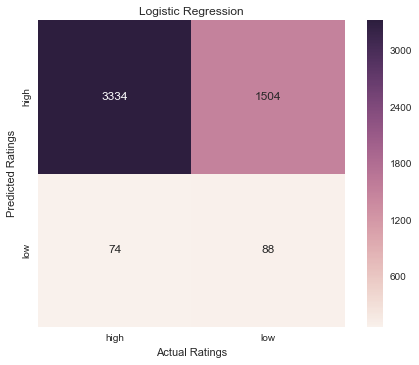

In [8]:
#Fancy boy confusion matrix
mat = metrics.confusion_matrix(y_test, logreg_predict)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=True, 
            xticklabels=unique(y_test), yticklabels=unique(logreg_predict))
plt.xlabel('Actual Ratings')
plt.ylabel('Predicted Ratings')
plt.title('Logistic Regression')

### KNN

In [9]:
k_range = range(1,101)
accuracies = []
for k in k_range:
    if k % 10 == 0:
        print 'Performing classifier', k
    knn = KNeighborsClassifier(n_neighbors=k)
    knn_classifier = knn.fit(x_train, y_train)
    knn_accuracy = knn.score(x_test, y_test)
    accuracies.append(knn_accuracy)


Performing classifier 10
Performing classifier 20
Performing classifier 30
Performing classifier 40
Performing classifier 50
Performing classifier 60
Performing classifier 70
Performing classifier 80
Performing classifier 90
Performing classifier 100


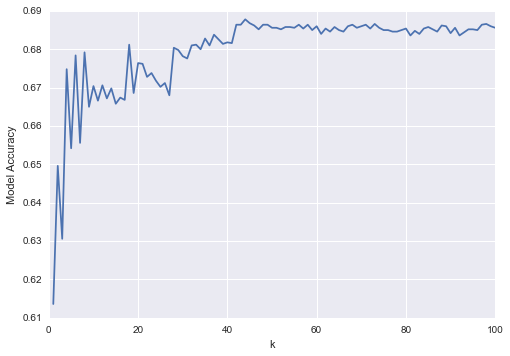

In [10]:
plot(k_range, accuracies)
xlabel('k')
ylabel('Model Accuracy')

In [11]:
s_accuracies = Series(accuracies)

k = s_accuracies.idxmax() + 1
knn = KNeighborsClassifier(n_neighbors=k)
knn_classifier = knn.fit(x_train, y_train)
knn_predict = knn.predict(x_test)

In [12]:
print 'K-NEAREST NEIGHBORS:'
print 'Precision:' + str(metrics.precision_score(y_test, knn_predict, average = 'binary', pos_label='high'))
print 'Recall: ' + str(metrics.recall_score(y_test, knn_predict, average = 'binary', pos_label='high'))
print 'Accuracy: ' + str(metrics.accuracy_score(y_test, knn_predict))

K-NEAREST NEIGHBORS:
Precision:0.692998955068
Recall: 0.973004694836
Accuracy: 0.6878


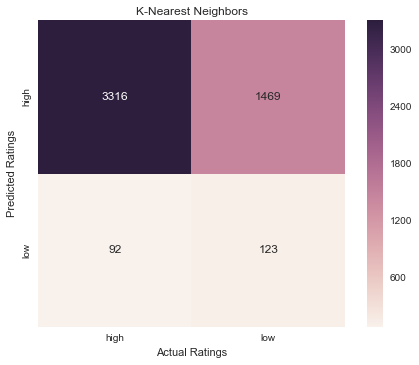

In [13]:
#Fancy boy confusion matrix
mat = metrics.confusion_matrix(y_test, knn_predict)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=True, 
            xticklabels=unique(y_test), yticklabels=unique(knn_predict))
plt.xlabel('Actual Ratings')
plt.ylabel('Predicted Ratings')
plt.title('K-Nearest Neighbors')

### Naive Bayes

In [14]:
bnb = BernoulliNB()
bnb_classifier = bnb.fit(x_train, y_train)
bnb_predict = bnb.predict(x_test)

In [15]:
print 'BERNOULLI NAIVE BAYES:'
print 'Precision:' + str(metrics.precision_score(y_test, bnb_predict, average = 'binary', pos_label='high'))
print 'Recall: ' + str(metrics.recall_score(y_test, bnb_predict, average = 'binary', pos_label='high'))
print 'Accuracy: ' + str(metrics.accuracy_score(y_test, bnb_predict))

BERNOULLI NAIVE BAYES:
Precision:0.6816
Recall: 1.0
Accuracy: 0.6816


C:\Users\Sean\AppData\Local\Continuum\Anaconda2\lib\site-packages\seaborn\matrix.py:142: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if yticklabels == []:


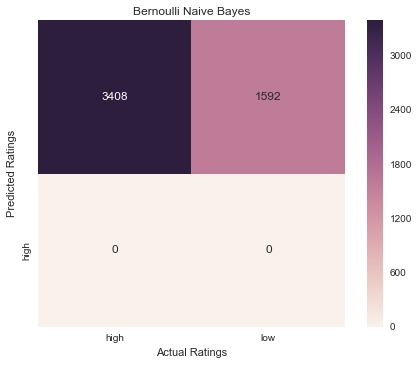

In [16]:
#Fancy boy confusion matrix
mat = metrics.confusion_matrix(y_test, bnb_predict)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=True, 
            xticklabels=unique(y_test), yticklabels=unique(bnb_predict))
plt.xlabel('Actual Ratings')
plt.ylabel('Predicted Ratings')
plt.title('Bernoulli Naive Bayes')

In [17]:
mnb = MultinomialNB()
mnb_classifier = mnb.fit(x_train, y_train)
mnb_predict = mnb.predict(x_test)

In [18]:
print 'MULTINOMIAL NAIVE BAYES:'
print 'Precision:' + str(metrics.precision_score(y_test, mnb_predict, average = 'binary', pos_label='high'))
print 'Recall: ' + str(metrics.recall_score(y_test, mnb_predict, average = 'binary', pos_label='high'))
print 'Accuracy: ' + str(metrics.accuracy_score(y_test, mnb_predict))

MULTINOMIAL NAIVE BAYES:
Precision:0.682055399438
Recall: 0.9970657277
Accuracy: 0.6812


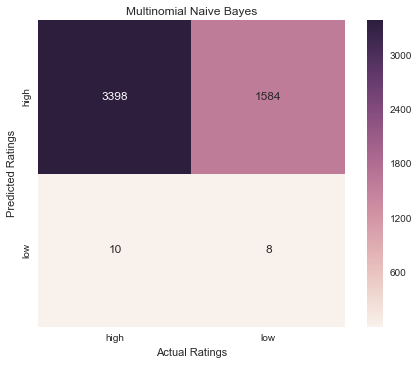

In [19]:
#Fancy boy confusion matrix
mat = metrics.confusion_matrix(y_test, mnb_predict)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=True, 
            xticklabels=unique(y_test), yticklabels=unique(mnb_predict))
plt.xlabel('Actual Ratings')
plt.ylabel('Predicted Ratings')
plt.title('Multinomial Naive Bayes')

## Task B: Reviews (Text Data) Only

In [20]:
sample = yelp.sample(10000, random_state=321)

# Split sample into train and test sets
trainB, testB = train_test_split(sample, test_size=0.25, random_state=123)

x_trainB = trainB['Review']
y_trainB = trainB['rating']

x_testB = testB['Review']
y_testB = testB['rating']

In [21]:
# Create matrix of token counts from reviews
vectorizer = CountVectorizer(analyzer = 'word', tokenizer= None, preprocessor = None, 
                             stop_words = None, max_features = None)

x_trainB = vectorizer.fit_transform(x_trainB)
x_testB = vectorizer.transform(x_testB)

### Naive Bayes

In [22]:
# Run Naive Bayes Classifier
mnb_classifierB = MultinomialNB().fit(x_trainB, y_trainB)

mnb_predictB = mnb_classifierB.predict(x_testB)

In [23]:
print 'Precision:' + str(metrics.precision_score(y_testB, mnb_predictB, average = 'binary', pos_label='high'))
print 'Recall: ' + str(metrics.recall_score(y_testB, mnb_predictB, average = 'binary', pos_label='high'))
print 'Accuracy: ' + str(metrics.accuracy_score(y_testB, mnb_predictB))

Precision:0.857612267251
Recall: 0.907826086957
Accuracy: 0.8324


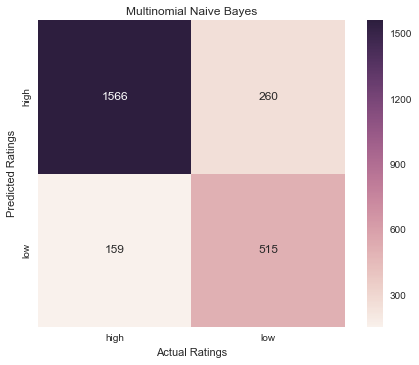

In [24]:
#Fancy boy confusion matrix
mat = metrics.confusion_matrix(y_testB, mnb_predictB)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=True, 
            xticklabels=unique(y_testB), yticklabels=unique(mnb_predictB))
plt.xlabel('Actual Ratings')
plt.ylabel('Predicted Ratings')
plt.title('Multinomial Naive Bayes')

### Logistic Regression

In [25]:
# Run Logistic Regression Classifier
logreg_classifierB = linear_model.LogisticRegression().fit(x_trainB, y_trainB)

logreg_predictB = logreg_classifierB.predict(x_testB)

In [26]:
print 'Precision:' + str(metrics.precision_score(y_testB, logreg_predictB, average = 'binary', pos_label='high'))
print 'Recall: ' + str(metrics.recall_score(y_testB, logreg_predictB, average = 'binary', pos_label='high'))
print 'Accuracy: ' + str(metrics.accuracy_score(y_testB, logreg_predictB))

Precision:0.863508178229
Recall: 0.887536231884
Accuracy: 0.8256


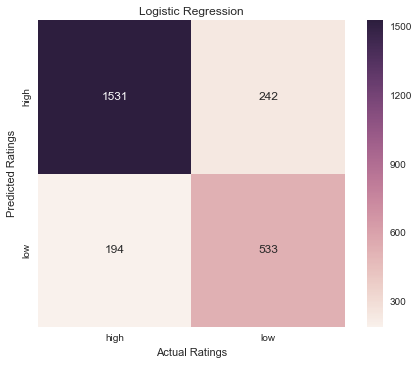

In [27]:
#Fancy boy confusion matrix
mat = metrics.confusion_matrix(y_testB, logreg_predictB)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=True, 
            xticklabels=unique(y_testB), yticklabels=unique(logreg_predictB))
plt.xlabel('Actual Ratings')
plt.ylabel('Predicted Ratings')
plt.title('Logistic Regression')

## Task C: Numeric and Text Data

In [28]:
x_trainC = trainB.drop(['stars', 'rating'], axis=1)
y_trainC = trainB['rating']

x_testC = testB.drop(['stars', 'rating'], axis=1)
y_testC = testB['rating']

## Part D

In [29]:
ss = pd.read_csv('YelpNoHeader+results.csv', header = None)
ss.head(1)

,0,1,2,3,4,5,6,7,8,9,...,13,14,15,16,17,18,19,20,21,22
0,2,2,2,2,1,0,0,0,0,0,...,0,0,0,0,0,0,1,CLOSED This JB s locati...,2,-2


In [30]:
ss['rating'] = np.where(ss[0] >= 4, 'high','low')

In [43]:
from sklearn.cross_validation import train_test_split
train, test = train_test_split(ss, test_size=0.25, random_state=123)

x_train = train[[21,22]].as_matrix()
y_train = train['rating'].reshape(-1,1)

x_test = test[[21,22]].as_matrix()
y_test = test['rating'].reshape(-1,1)

C:\Users\Sean\AppData\Local\Continuum\Anaconda2\lib\site-packages\sklearn\utils\validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)



Logistic Regression Out of Sample Accuracy: 0.723


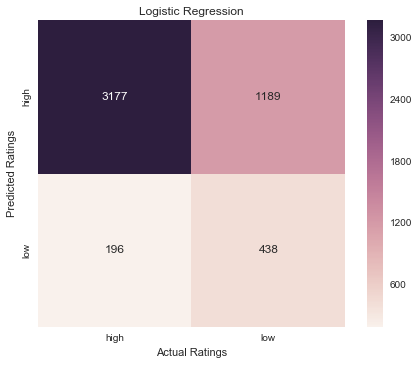

In [44]:
import sklearn
from sklearn import linear_model
from sklearn.metrics import precision_recall_curve as prc

logreg = linear_model.LogisticRegression(fit_intercept=False)
logreg_classifier = logreg.fit(x_train, y_train)
#logreg_predict_in_sample = logreg.predict(x_train)
logreg_predict_out_of_sample = logreg.predict(x_test)
logreg_testAccuracy = logreg.score(x_test, y_test)



mat = metrics.confusion_matrix(y_test, logreg_predict_out_of_sample)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=True, 
            xticklabels=unique(y_testB), yticklabels=unique(logreg_predictB))
plt.xlabel('Actual Ratings')
plt.ylabel('Predicted Ratings')
plt.title('Logistic Regression')
print
print 'Logistic Regression Out of Sample Accuracy:', logreg_testAccuracy


In [ ]:
from sklearn.neighbors import KNeighborsClassifier as knn
accuracies = []
for i in range(40):
    kn = knn(weights='distance',n_neighbors=i+1)
    kn_classifier = kn.fit(x_train, y_train.ravel())
    kn_out_of_sample = kn.predict(x_test)
    kn_testAccuracy = kn.score(x_test, y_test)
    accuracies.append(kn_testAccuracy)

plot(accuracies)
plt.xlabel('K')
plt.ylabel('Precision')
plt.title('KNN')

C:\Users\Sean\AppData\Local\Continuum\Anaconda2\lib\site-packages\ipykernel\__main__.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  app.launch_new_instance()



Logistic Regression Out of Sample Accuracy: 0.7196


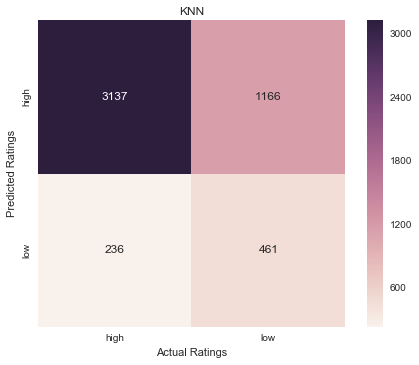

In [57]:

kn = knn(weights='distance',n_neighbors=15)
kn_classifier = kn.fit(x_train, y_train)
kn_out_of_sample = kn.predict(x_test)
kn_testAccuracy = kn.score(x_test, y_test)



mat = metrics.confusion_matrix(y_test, kn_out_of_sample)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=True, 
            xticklabels=unique(y_testB), yticklabels=unique(logreg_predictB))
plt.xlabel('Actual Ratings')
plt.ylabel('Predicted Ratings')
plt.title('KNN')
print
print 'Logistic Regression Out of Sample Accuracy:', kn_testAccuracy

## Part E

In [33]:
import nltk
from nltk import word_tokenize
from nltk.tokenize import RegexpTokenizer

yelpsub = yelp.sample(500)

# Tokenize all job descriptions from sample
yelpsub['tokenized_strip'] = yelpsub.apply(lambda row: row['Review'].decode('utf-8').strip(),axis=1)
yelpsub['tokenized'] = yelpsub.apply(lambda row: nltk.word_tokenize(row['tokenized_strip']),axis=1)

In [34]:
reviews = []
for index, value in yelpsub.iterrows():
    reviews.append(value['tokenized'])

In [35]:
reviews_lower = []
for review in reviews:
    review_lower = []
    for token in review:
        token_lower = token.lower()
        review_lower.append(token_lower)
    reviews_lower.append(review_lower)

In [36]:
reviews = reviews_lower

all_count = 0
for review in reviews:
    for token in review:
        all_count += 1

all_count

76629

In [37]:
single_dict = {}
for review in reviews:
    for token in review:
        if token in single_dict:
            single_dict[token] += 1
        else:
            single_dict[token] = 1

In [38]:
bigrams = []
for review in reviews:
    small_list = []
    for i in range(len(review[0:-1])):
        small_list.append((review[i], review[i+1]))
    bigrams.append(small_list)

bigram_dict = {}
for review in bigrams:
    for tup in review:
        tup_space = ' '.join(tup)
        if tup_space in bigram_dict:
            bigram_dict[tup_space] += 1
        else:
            bigram_dict[tup_space] = 1

In [39]:
bigram_count = 0
for review in bigrams:
    for bigram in review:
        bigram_count += 1
        
bigram_count

76129

In [40]:
import math

zipped = []
for bigram in bigram_dict: 
    bigram_sep = bigram.split()
    p_bi = bigram_dict[bigram] / (bigram_count * 1.0)
    p_word1 = single_dict[bigram_sep[0]] / (all_count * 1.0)
    p_word2 = single_dict[bigram_sep[1]] / (all_count * 1.0)
    pmi = math.log(p_bi / (p_word1 * p_word2) * 1.0)
    
    zipped.append((bigram, bigram_dict[bigram], bigram_sep[0], single_dict[bigram_sep[0]], bigram_sep[1], single_dict[bigram_sep[1]], pmi))

In [41]:
zipped_sorted = sorted(zipped, key=lambda x: x[6])
zipped_sorted.reverse()
for a,b,c,d,e,f,g in zipped_sorted[300:320]:
    print a, g

i-don t-hate-you-for-being-here 11.2532771995
dj spinning 11.2532771995
fiji albacore 11.2532771995
kona grills 11.2532771995
kashk e 11.2532771995
helper/ guard 11.2532771995
peacefully grazing 11.2532771995
delicious.spicy saigon- 11.2532771995
rootbeer float 11.2532771995
silent agreement 11.2532771995
plaid patterns 11.2532771995
minty= amazing.wasabi 11.2532771995
speed dial 11.2532771995
scares out-of-towners 10.560130019
sports authority 10.560130019
contemporary décor 10.560130019
unsuspecting homeowner 10.560130019
chihuahua contest 10.560130019
dimly lit 10.560130019
flimsiest plastic 10.560130019
